In [1]:
# load libraries
import pandas as pd
import numpy as np
import os
import nltk
nltk.download("punkt")
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
import zipfile
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hanna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hanna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
stop_words = pd.read_csv('stop_words_english.txt', delimiter=',')
stop_words = list(stop_words['able'])

In [3]:
stop_words.append('able')

In [4]:
print(stop_words[0:15])

['about', 'above', 'abroad', 'according', 'accordingly', 'across', 'actually', 'adj', 'after', 'afterwards', 'again', 'against', 'ago', 'ahead', "ain't"]


In [5]:
my_docs_text = 'documents/'
other_docs_text = 'otherDocs/'

#         with open(dirct + doc, encoding='utf-8', errors='replace') as f:


In [6]:
def read_text(dir):
    
    # variable for the text
    corpus = ""
    
    # names of all the documents in the directories
    names = os.listdir(dir)
    
    # loop through names
    for name in names:
        
        # create a file path with the curent name
        file_path = dir + os.sep + name
        if name.endswith(".txt"):

            # open the file and read text
            with open(file_path, "rb") as f:
                content = f.read()
                content = str(content)
                    
                # add the text to corpus
                corpus = corpus + content
    
    # remove unwanted characters from the text
    corpus = corpus.replace("\\n", "")
    corpus = corpus.replace("\\", "")
    
    # case fold - lower the corpus
    corpus = corpus.lower()
    
    # remove stop words
    # list of stop words
    corpus = [word for word in corpus.split() if word.lower() not in stop_words]
    corpus = " ".join(corpus)
    

    # return the corpus
    return corpus

In [7]:
my_cleaned_text = read_text(my_docs_text)
other_cleand_text = read_text(other_docs_text)

In [8]:
print(my_cleaned_text[0:16])

b'a comparison e


In [9]:
my_tokens = my_cleaned_text.split(".")
other_tokens = other_cleand_text.split(".")

In [10]:
# function to remove all the tokens that are shorter than threshold (100)
def clean_tokens(tokens):
    
    # empty list to grab tokens
    cleaned_tokens = []
    
    # toop through the tokens
    for token in tokens:
        
        # check if the length of the tokens is greater than the threshold
        if len(token) > 100:
            
            # append tokens
            cleaned_tokens.append(token)
            
    # return cleaned tokens
    return cleaned_tokens

In [11]:
# call clean_tokens
my_cleaned_tokens = clean_tokens(my_tokens)
not_my_cleaned_tokens = clean_tokens(other_tokens)

In [12]:
len(not_my_cleaned_tokens)

9834

In [13]:
len(my_cleaned_tokens)


9052

In [14]:
# make a dataframe out of tokens

# df for my_cleaned_tokens
df1 = pd.DataFrame({"Tokens": my_cleaned_tokens, "id": 1})

# df for not_my_cleaned_tokens
df2 = pd.DataFrame({"Tokens": not_my_cleaned_tokens, "id": 0})

# join df1 and df2
df = pd.concat([df1, df2])

# shuffle the final df
df = df.sample(frac=1).reset_index(drop=True)

In [15]:
df[0:50]

,Tokens,id
0,"adopting negative view disability, andpeople ...",0
1,another promising direction build turingxe2x80...,1
2,type bias observed therecidivism risk predict...,0
3,"grateful hannah burke, maria musarella, peter...",0
4,"similarly, internal nodes represent tests, bra...",1
5,ourempirical analysis behavior traders social...,0
6,25there key differences establishing clean rac...,0
7,", 2015) semantic segmentationalgorithm learns ...",1
8,thisgender bias magnified greater degree lang...,0
9,"x00 x00jx00ux00sx00tx00ix00cx00ex00,x00 x00tx0...",0


In [16]:
tfidf = TfidfVectorizer()
tfidf.fit_transform(df.Tokens).todense().shape

(18886, 66210)

In [17]:
# Pre-process the text data
texts = [row.split() for row in df['Tokens']]

# Train the word2vec model on the pre-processed text data
model = Word2Vec(texts, window=5, min_count=1)

# Convert each row into an embedding by averaging the embeddings of the individual words
df['features'] = df['Tokens'].apply(lambda x: sum([model.wv[word] for word in x.split()]) / len(x.split()))

In [18]:
df

,Tokens,id,features
0,"adopting negative view disability, andpeople ...",0,"[-0.054215986, 0.080714084, 0.057155516, -0.00..."
1,another promising direction build turingxe2x80...,1,"[-0.06439579, 0.0679971, 0.10361941, -0.027411..."
2,type bias observed therecidivism risk predict...,0,"[-0.10275358, 0.13914862, 0.12581119, -0.02408..."
3,"grateful hannah burke, maria musarella, peter...",0,"[-0.045994285, 0.07458166, 0.05042454, -0.0058..."
4,"similarly, internal nodes represent tests, bra...",1,"[-0.06817492, 0.11111224, 0.070369236, -0.0079..."
...,...,...,...
18881,"assess unitsin temporal dimension, label sttd...",1,"[-0.050745945, 0.06578728, 0.057035383, -0.012..."
18882,deepcloak reduces capacity attacker togenerate...,1,"[-0.06667739, 0.0912335, 0.08518341, -0.010527..."
18883,x00 x00gx00lx00ox00vx00ex00:x00 x00gx00lx00ox0...,0,"[-0.21938252, 0.6123099, 0.0063194153, 0.16926..."
18884,"combinationof qualitative measures, extreme s...",0,"[-0.1389887, 0.19026649, 0.18425144, -0.035330..."


In [19]:
features = []

for i in range(len(df)):
    features.append(list(df['features'][i]))
x = pd.DataFrame(features)

In [20]:
x

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.054216,0.080714,0.057156,-0.004089,0.024355,-0.184685,0.053238,0.217838,-0.058682,-0.088785,...,0.151423,0.054253,0.030224,0.024751,0.190166,0.046869,0.128737,-0.152320,0.036591,0.030078
1,-0.064396,0.067997,0.103619,-0.027411,0.023926,-0.298282,0.082369,0.337052,-0.076400,-0.166097,...,0.235569,0.033008,0.034732,0.084500,0.253247,0.054094,0.223021,-0.211232,0.052466,0.004859
2,-0.102754,0.139149,0.125811,-0.024086,0.045913,-0.378845,0.107143,0.425800,-0.109784,-0.186421,...,0.310813,0.080178,0.046760,0.091849,0.336195,0.091632,0.278584,-0.268730,0.063283,0.051172
3,-0.045994,0.074582,0.050425,-0.005844,0.021960,-0.168383,0.046950,0.201021,-0.055812,-0.082633,...,0.139576,0.051191,0.029641,0.025623,0.171893,0.043477,0.116056,-0.139366,0.032194,0.029321
4,-0.068175,0.111112,0.070369,-0.007965,0.033137,-0.243062,0.070726,0.273116,-0.083850,-0.105825,...,0.194048,0.070809,0.035301,0.036764,0.237014,0.062773,0.165136,-0.195493,0.043328,0.038940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18881,-0.050746,0.065787,0.057035,-0.012209,0.019425,-0.177106,0.045785,0.198294,-0.053570,-0.086919,...,0.141817,0.031938,0.022004,0.039728,0.156491,0.040833,0.127199,-0.125798,0.031911,0.021413
18882,-0.066677,0.091233,0.085183,-0.010527,0.033059,-0.258759,0.074665,0.301697,-0.083967,-0.134515,...,0.208648,0.062727,0.041002,0.053195,0.249096,0.059645,0.182186,-0.202261,0.049406,0.026720
18883,-0.219383,0.612310,0.006319,0.169260,0.154403,-0.517855,0.213686,0.837849,-0.431012,-0.131639,...,0.468617,0.605163,0.259790,-0.312916,1.067237,0.218200,0.182428,-0.823199,0.193273,0.305830
18884,-0.138989,0.190266,0.184251,-0.035331,0.056771,-0.535353,0.144696,0.595268,-0.147579,-0.257798,...,0.438731,0.107065,0.056704,0.139020,0.459535,0.131253,0.399086,-0.361056,0.086609,0.077396


In [21]:
X_select = pd.DataFrame(x.copy())
X_select

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.054216,0.080714,0.057156,-0.004089,0.024355,-0.184685,0.053238,0.217838,-0.058682,-0.088785,...,0.151423,0.054253,0.030224,0.024751,0.190166,0.046869,0.128737,-0.152320,0.036591,0.030078
1,-0.064396,0.067997,0.103619,-0.027411,0.023926,-0.298282,0.082369,0.337052,-0.076400,-0.166097,...,0.235569,0.033008,0.034732,0.084500,0.253247,0.054094,0.223021,-0.211232,0.052466,0.004859
2,-0.102754,0.139149,0.125811,-0.024086,0.045913,-0.378845,0.107143,0.425800,-0.109784,-0.186421,...,0.310813,0.080178,0.046760,0.091849,0.336195,0.091632,0.278584,-0.268730,0.063283,0.051172
3,-0.045994,0.074582,0.050425,-0.005844,0.021960,-0.168383,0.046950,0.201021,-0.055812,-0.082633,...,0.139576,0.051191,0.029641,0.025623,0.171893,0.043477,0.116056,-0.139366,0.032194,0.029321
4,-0.068175,0.111112,0.070369,-0.007965,0.033137,-0.243062,0.070726,0.273116,-0.083850,-0.105825,...,0.194048,0.070809,0.035301,0.036764,0.237014,0.062773,0.165136,-0.195493,0.043328,0.038940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18881,-0.050746,0.065787,0.057035,-0.012209,0.019425,-0.177106,0.045785,0.198294,-0.053570,-0.086919,...,0.141817,0.031938,0.022004,0.039728,0.156491,0.040833,0.127199,-0.125798,0.031911,0.021413
18882,-0.066677,0.091233,0.085183,-0.010527,0.033059,-0.258759,0.074665,0.301697,-0.083967,-0.134515,...,0.208648,0.062727,0.041002,0.053195,0.249096,0.059645,0.182186,-0.202261,0.049406,0.026720
18883,-0.219383,0.612310,0.006319,0.169260,0.154403,-0.517855,0.213686,0.837849,-0.431012,-0.131639,...,0.468617,0.605163,0.259790,-0.312916,1.067237,0.218200,0.182428,-0.823199,0.193273,0.305830
18884,-0.138989,0.190266,0.184251,-0.035331,0.056771,-0.535353,0.144696,0.595268,-0.147579,-0.257798,...,0.438731,0.107065,0.056704,0.139020,0.459535,0.131253,0.399086,-0.361056,0.086609,0.077396


In [22]:
X_select = pd.DataFrame(x.copy())
y_select = df['id'].values

model = LogisticRegression()

rfe = RFE(model, n_features_to_select=15)

# Fit the RFE object to the data
rfe.fit(X_select, y_select)

best_features = X_select.columns[rfe.support_].tolist()

print(best_features)

X_select = X_select[best_features]
X_select

[0, 3, 11, 14, 22, 35, 45, 46, 53, 55, 56, 63, 70, 82, 99]


,0,3,11,14,22,35,45,46,53,55,56,63,70,82,99
0,-0.054216,-0.004089,-0.192447,0.065512,0.121918,0.119374,-0.050329,-0.118719,-0.046855,0.076513,0.058209,0.038005,-0.045395,-0.076813,0.030078
1,-0.064396,-0.027411,-0.279883,0.104910,0.189054,0.146971,-0.111819,-0.162598,-0.111093,0.150610,0.039580,0.092550,-0.061654,-0.176118,0.004859
2,-0.102754,-0.024086,-0.377293,0.132658,0.250333,0.233054,-0.107382,-0.239291,-0.125225,0.176772,0.075751,0.085886,-0.104359,-0.190723,0.051172
3,-0.045994,-0.005844,-0.172671,0.060047,0.108551,0.108157,-0.044762,-0.108563,-0.043807,0.068533,0.052516,0.033430,-0.039434,-0.073936,0.029321
4,-0.068175,-0.007965,-0.248067,0.089378,0.156562,0.149254,-0.060889,-0.152170,-0.066500,0.101889,0.066512,0.050680,-0.057943,-0.097146,0.038940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18881,-0.050746,-0.012209,-0.177123,0.065539,0.118044,0.104246,-0.055557,-0.105774,-0.067144,0.080810,0.033629,0.041186,-0.042195,-0.085798,0.021413
18882,-0.066677,-0.010527,-0.262522,0.092788,0.167101,0.150473,-0.080402,-0.162722,-0.081850,0.114247,0.058087,0.070447,-0.056086,-0.132792,0.026720
18883,-0.219383,0.169260,-0.722208,0.197019,0.250297,0.520117,0.063588,-0.450977,0.199129,-0.038297,0.642252,0.005273,-0.008864,0.138161,0.305830
18884,-0.138989,-0.035331,-0.523882,0.182754,0.348210,0.334477,-0.151832,-0.341212,-0.180513,0.257836,0.100761,0.108937,-0.165952,-0.278303,0.077396


In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, df['id'].values, test_size=0.1, random_state=42)
X_train_select, X_test_select, y_train_select, y_test_select = train_test_split(X_select, df['id'].values, test_size=0.1, random_state=42)


# Gaussian Naive Bayes

Best hyperparameters: {'var_smoothing': 1e-09}
Best score: 0.63
              precision    recall  f1-score   support

           0       0.95      0.31      0.47      1005
           1       0.56      0.98      0.71       884

    accuracy                           0.63      1889
   macro avg       0.75      0.65      0.59      1889
weighted avg       0.76      0.63      0.58      1889



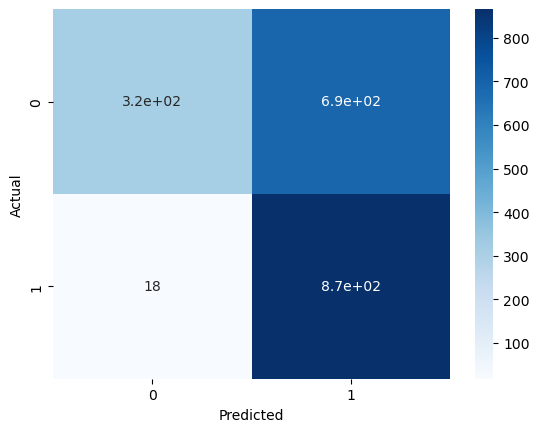

documents classifed mine but they are not mine:

1      another promising direction build turingxe2x80...
7      , 2015) semantic segmentationalgorithm learns ...
12     training convenient, handle data organized toi...
18      specific applications, acquire theknowledge e...
19      xai algorithms suchas shap, lime scoped rules...
24     user-based studies interpretability decision-r...
35      general, decompose signals propagatedwithin a...
37     balanced accuracy [49] global estimate per-for...
51      inother cases, process quality measured perfo...
52      posturex0canalysis detection head gesture (sh...
56      hands-on tutorial european conference machine...
58      simple explanations lack nuances necessaryto ...
83      wecompare xai4fl popular sbfl techniques com-...
91     35x0czlesul lsin/8z09'0l/b10 lopy/:sdyy :woy s...
93      case uncertainty learner model com-plexity pe...
95      however,its complexity large number hidden ne...
102     properties csre basedon fact so

In [24]:
estimator_NB = GaussianNB()

param_grid_NB = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator_NB, param_grid_NB, cv=kfold, n_jobs=-1)

grid_search.fit(X_train, y_train)

print('Best hyperparameters: {}'.format(grid_search.best_params_))
print('Best score: {:.2f}'.format(grid_search.best_score_))

y_pred = grid_search.predict(X_test)

print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

misclassified_tokens = np.where(y_test != y_pred)[0:10]

filtered_df = df.loc[misclassified_tokens][['Tokens', 'id']]

print("documents classifed mine but they are not mine:\n")
print(filtered_df[filtered_df['id']== 1]['Tokens'].head(20))

print()

print("documents classifed not mine but they are  mine:\n")
print(filtered_df[filtered_df['id']== 0]['Tokens'].head(20))

### after feature selection

Best hyperparameters: {'var_smoothing': 1e-09}
Best score: 0.64
              precision    recall  f1-score   support

           0       0.91      0.35      0.51      1005
           1       0.57      0.96      0.71       884

    accuracy                           0.64      1889
   macro avg       0.74      0.66      0.61      1889
weighted avg       0.75      0.64      0.60      1889



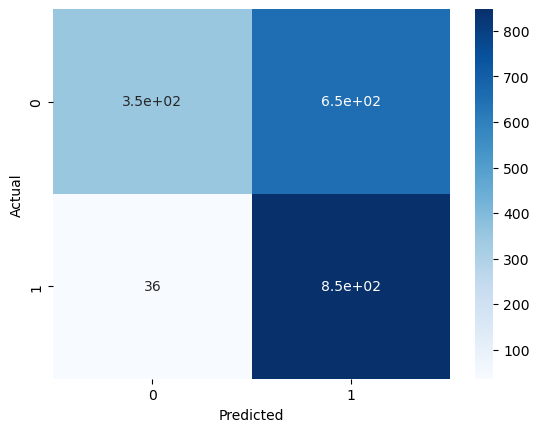

documents classifed mine but they are not mine:

1      another promising direction build turingxe2x80...
7      , 2015) semantic segmentationalgorithm learns ...
12     training convenient, handle data organized toi...
18      specific applications, acquire theknowledge e...
24     user-based studies interpretability decision-r...
35      general, decompose signals propagatedwithin a...
37     balanced accuracy [49] global estimate per-for...
51      inother cases, process quality measured perfo...
52      posturex0canalysis detection head gesture (sh...
56      hands-on tutorial european conference machine...
58      simple explanations lack nuances necessaryto ...
83      wecompare xai4fl popular sbfl techniques com-...
91     35x0czlesul lsin/8z09'0l/b10 lopy/:sdyy :woy s...
93      case uncertainty learner model com-plexity pe...
95      however,its complexity large number hidden ne...
102     properties csre basedon fact soil rammed mixt...
104    in opinion, disadvantage possibi

In [25]:
estimator_NB_sel = GaussianNB()

param_grid_NB = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator_NB_sel, param_grid_NB, cv=kfold, n_jobs=-1)

grid_search.fit(X_train_select, y_train_select)

print('Best hyperparameters: {}'.format(grid_search.best_params_))
print('Best score: {:.2f}'.format(grid_search.best_score_))

y_pred_selec = grid_search.predict(X_test_select)

print(classification_report(y_test_select, y_pred_selec))


cm = confusion_matrix(y_test_select, y_pred_selec)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

misclassified_tokens = np.where(y_test_select != y_pred_selec)[0:10]

filtered_df = df.loc[misclassified_tokens][['Tokens', 'id']]

print("documents classifed mine but they are not mine:\n")
print(filtered_df[filtered_df['id']== 1]['Tokens'].head(20))

print()

print("documents classifed not mine but they are  mine:\n")
print(filtered_df[filtered_df['id']== 0]['Tokens'].head(20))

# Bernoulli  Naive Bayes

Best hyperparameters: {'alpha': 0.1, 'binarize': 0.0}
Best score: 0.64
              precision    recall  f1-score   support

           0       0.91      0.33      0.49      1005
           1       0.56      0.96      0.71       884

    accuracy                           0.63      1889
   macro avg       0.74      0.65      0.60      1889
weighted avg       0.75      0.63      0.59      1889



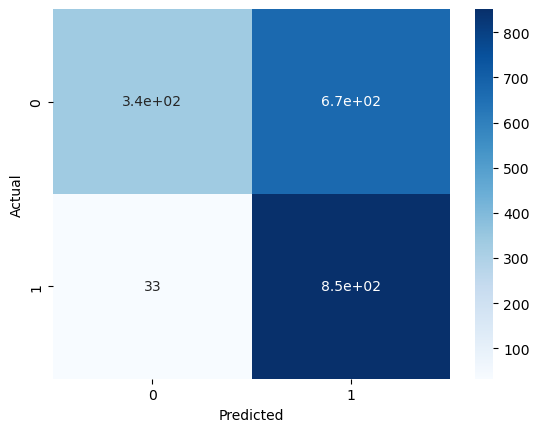

documents classifed mine but they are not mine:

1      another promising direction build turingxe2x80...
7      , 2015) semantic segmentationalgorithm learns ...
12     training convenient, handle data organized toi...
18      specific applications, acquire theknowledge e...
19      xai algorithms suchas shap, lime scoped rules...
24     user-based studies interpretability decision-r...
35      general, decompose signals propagatedwithin a...
37     balanced accuracy [49] global estimate per-for...
51      inother cases, process quality measured perfo...
52      posturex0canalysis detection head gesture (sh...
56      hands-on tutorial european conference machine...
58      simple explanations lack nuances necessaryto ...
59      mueller, explaining explanation xe2x80x9cexpl...
83      wecompare xai4fl popular sbfl techniques com-...
91     35x0czlesul lsin/8z09'0l/b10 lopy/:sdyy :woy s...
93      case uncertainty learner model com-plexity pe...
95      however,its complexity large nu

In [26]:
clf = BernoulliNB()

param_grid = {'alpha': [0.1, 1.0, 10.0], 'binarize': [0.0, 0.5, 1.0]}


grid_search = GridSearchCV(clf, param_grid, cv=kfold, n_jobs=-1)

grid_search.fit(X_train, y_train)

print('Best hyperparameters: {}'.format(grid_search.best_params_))
print('Best score: {:.2f}'.format(grid_search.best_score_))

y_pred = grid_search.predict(X_test)

print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

misclassified_tokens = np.where(y_test != y_pred)[0:10]

filtered_df = df.loc[misclassified_tokens][['Tokens', 'id']]

print("documents classifed mine but they are not mine:\n")
print(filtered_df[filtered_df['id']== 1]['Tokens'].head(20))

print()

print("documents classifed not mine but they are  mine:\n")
print(filtered_df[filtered_df['id']== 0]['Tokens'].head(20))

בסיווג טקסט, נהוג להיתקל במערכי נתונים לא מאוזנים, כאשר למחלקה אחת יש יותר דגימות משמעותית מהשנייה. בדוגמה שלך, מספר הדגימות בכל מחלקה שווה בערך, אבל הביצועים של המודל בכל מחלקה שונים לגמרי.

ציון הדיוק מודד את שיעור התוצאות החיוביות האמיתיות מבין הדגימות שנחזו להיות חיוביות. במקרה זה, הדיוק למחלקה 0 הוא 0.92, מה שאומר שכאשר המודל ניבא מדגם שייך למחלקה 0, הוא היה נכון ב-92% מהמקרים. הדיוק עבור מחלקה 1 הוא 0.58, מה שאומר שכאשר המודל ניבא מדגם שייך למחלקה 1, הוא היה נכון ב-58% מהמקרים.

ציון ההיזכרות מודד את שיעור התוצאות החיוביות האמיתיות שזוהו בצורה נכונה על ידי המודל. במקרה זה, הריקול עבור מחלקה 0 הוא 0.29, כלומר המודל זיהה נכון רק 29% מהדגימות ששייכות בפועל למחלקה 0. הריקול עבור מחלקה 1 היא 0.97, כלומר המודל זיהה נכון 97% מ- הדגימות ששייכות למעשה לכיתה 1.

ציון F1 הוא הממוצע ההרמוני של דיוק וזכירה, והוא משמש לעתים קרובות כמדד סיכום המאזן את שני המדדים. במקרה זה, ציון F1 עבור מחלקה 0 הוא 0.44, בעוד שציון F1 עבור מחלקה 1 הוא 0.73.

ציון הדיוק מודד את שיעור הדגימות המסווגות בצורה נכונה, ובמקרה זה הוא 0.63, מה שאומר שהמודל סיווג נכון 63% מהדגימות.

ממוצע המאקרו הוא הממוצע של דיוק, זכירה וציון F1 עבור כל מחלקה, בעוד שהממוצע המשוקלל הוא הממוצע המשוקלל של ציונים אלה, המשוקלל לפי מספר הדגימות בכל מחלקה. במקרה זה, ממוצע המאקרו של דיוק, ריקול וציון F1 הוא 0.75 עבור כל אחד מהם, בעוד שהממוצע המשוקלל הוא 0.75 עבור דיוק וציון F1, ו-0.63 עבור ריקול.

האופי הבלתי מאוזן של מערך הנתונים, בשילוב עם הביצועים של המודל, יכול להוביל לציונים נמוכים יותר עבור מעמד המיעוט (מחלקה 0 במקרה זה) וציונים גבוהים יותר עבור מעמד הרוב (כיתה 1). לעתים קרובות זהו אתגר בסיווג טקסט, וניתן להשתמש בטכניקות שונות כדי לטפל בו, כמו דגימה מחדש של הנתונים, התאמת משקלי המחלקות או שימוש במדדי הערכה שונים המתאימים יותר למערכי נתונים לא מאוזנים.

## after feature selection

Best hyperparameters: {'alpha': 0.1, 'binarize': 0.0}
Best score: 0.64
              precision    recall  f1-score   support

           0       0.93      0.33      0.49      1005
           1       0.56      0.97      0.71       884

    accuracy                           0.63      1889
   macro avg       0.75      0.65      0.60      1889
weighted avg       0.76      0.63      0.60      1889



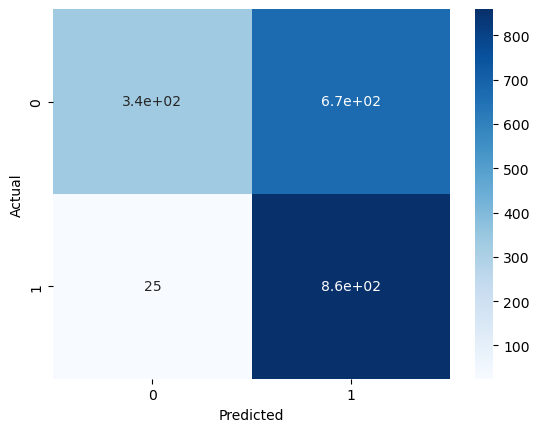

documents classifed mine but they are not mine:

1      another promising direction build turingxe2x80...
7      , 2015) semantic segmentationalgorithm learns ...
12     training convenient, handle data organized toi...
18      specific applications, acquire theknowledge e...
19      xai algorithms suchas shap, lime scoped rules...
24     user-based studies interpretability decision-r...
35      general, decompose signals propagatedwithin a...
37     balanced accuracy [49] global estimate per-for...
51      inother cases, process quality measured perfo...
52      posturex0canalysis detection head gesture (sh...
56      hands-on tutorial european conference machine...
58      simple explanations lack nuances necessaryto ...
59      mueller, explaining explanation xe2x80x9cexpl...
83      wecompare xai4fl popular sbfl techniques com-...
91     35x0czlesul lsin/8z09'0l/b10 lopy/:sdyy :woy s...
93      case uncertainty learner model com-plexity pe...
95      however,its complexity large nu

In [27]:
clf = BernoulliNB()

param_grid = {'alpha': [0.1, 1.0, 10.0], 'binarize': [0.0, 0.5, 1.0]}


grid_search = GridSearchCV(clf, param_grid, cv=kfold, n_jobs=-1)

grid_search.fit(X_train_select, y_train_select)

print('Best hyperparameters: {}'.format(grid_search.best_params_))
print('Best score: {:.2f}'.format(grid_search.best_score_))

y_pred_selec = grid_search.predict(X_test_select)

print(classification_report(y_test_select, y_pred_selec))


cm = confusion_matrix(y_test, y_pred_selec)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


misclassified_tokens = np.where(y_test_select != y_pred_selec)[0:10]

filtered_df = df.loc[misclassified_tokens][['Tokens', 'id']]

print("documents classifed mine but they are not mine:\n")
print(filtered_df[filtered_df['id']== 1]['Tokens'].head(20))

print()

print("documents classifed not mine but they are  mine:\n")
print(filtered_df[filtered_df['id']== 0]['Tokens'].head(20))


# NearestCentroid / Rocchio

Best hyperparameters: {'metric': 'manhattan', 'shrink_threshold': 1.0}
Best score: 0.67
              precision    recall  f1-score   support

           0       0.68      0.71      0.69      1005
           1       0.65      0.62      0.63       884

    accuracy                           0.67      1889
   macro avg       0.66      0.66      0.66      1889
weighted avg       0.67      0.67      0.67      1889



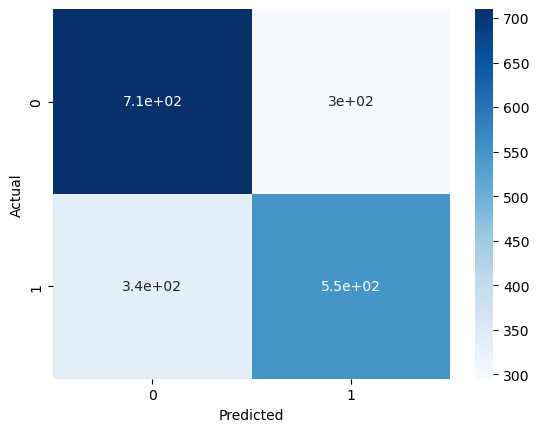

documents classifed mine but they are not mine:

1      another promising direction build turingxe2x80...
12     training convenient, handle data organized toi...
14     since 2004, leading dod appliedresearch projec...
21      7, july 2020table iresults ablation study 256...
36      [12] evaluated explanation accuracyof xe2x80x...
40      distribution articles basedon application dom...
49      types models developed: logistic regression, ...
51      inother cases, process quality measured perfo...
59      mueller, explaining explanation xe2x80x9cexpl...
62      inproceedings 2020 ieee international confere...
83      wecompare xai4fl popular sbfl techniques com-...
84      lack explainability beendisclosed european un...
91     35x0czlesul lsin/8z09'0l/b10 lopy/:sdyy :woy s...
93      case uncertainty learner model com-plexity pe...
95      however,its complexity large number hidden ne...
99      [74] pointedout fascinating adversarialml dee...
104    in opinion, disadvantage possibi

In [28]:
rocc = NearestCentroid()

param_grid = {'metric': ['euclidean', 'manhattan', 'minkowski'], 'shrink_threshold': [None, 0.1, 0.5, 1.0]}

grid_search = GridSearchCV(rocc, param_grid, cv=kfold, n_jobs=-1)

grid_search.fit(X_train, y_train)


print('Best hyperparameters: {}'.format(grid_search.best_params_))
print('Best score: {:.2f}'.format(grid_search.best_score_))

y_pred= grid_search.predict(X_test)


print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


misclassified_tokens = np.where(y_test != y_pred)[0:10]

filtered_df = df.loc[misclassified_tokens][['Tokens', 'id']]

print("documents classifed mine but they are not mine:\n")
print(filtered_df[filtered_df['id']== 1]['Tokens'].head(20))

print()

print("documents classifed not mine but they are  mine:\n")
print(filtered_df[filtered_df['id']== 0]['Tokens'].head(20))


## after feature selection

Best hyperparameters: {'metric': 'manhattan', 'shrink_threshold': 0.5}
Best score: 0.68
              precision    recall  f1-score   support

           0       0.69      0.70      0.69      1005
           1       0.65      0.64      0.65       884

    accuracy                           0.67      1889
   macro avg       0.67      0.67      0.67      1889
weighted avg       0.67      0.67      0.67      1889



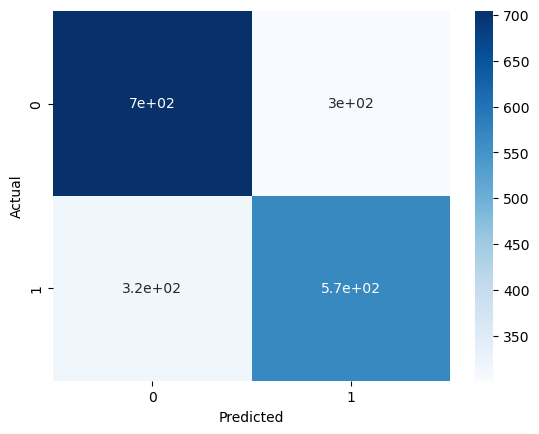

documents classifed mine but they are not mine:

1      another promising direction build turingxe2x80...
12     training convenient, handle data organized toi...
14     since 2004, leading dod appliedresearch projec...
21      7, july 2020table iresults ablation study 256...
36      [12] evaluated explanation accuracyof xe2x80x...
40      distribution articles basedon application dom...
49      types models developed: logistic regression, ...
51      inother cases, process quality measured perfo...
59      mueller, explaining explanation xe2x80x9cexpl...
62      inproceedings 2020 ieee international confere...
83      wecompare xai4fl popular sbfl techniques com-...
84      lack explainability beendisclosed european un...
91     35x0czlesul lsin/8z09'0l/b10 lopy/:sdyy :woy s...
93      case uncertainty learner model com-plexity pe...
95      however,its complexity large number hidden ne...
99      [74] pointedout fascinating adversarialml dee...
102     properties csre basedon fact so

In [29]:
rocc = NearestCentroid()

param_grid = {'metric': ['euclidean', 'manhattan', 'minkowski'], 'shrink_threshold': [None, 0.1, 0.5, 1.0]}

grid_search = GridSearchCV(rocc, param_grid, cv=kfold, n_jobs=-1)

grid_search.fit(X_train_select, y_train_select)


print('Best hyperparameters: {}'.format(grid_search.best_params_))
print('Best score: {:.2f}'.format(grid_search.best_score_))

y_pred_selec= grid_search.predict(X_test_select)


print(classification_report(y_test, y_pred_selec))


cm = confusion_matrix(y_test_select, y_pred_selec)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


misclassified_tokens = np.where(y_test_select != y_pred_selec)[0:10]

filtered_df = df.loc[misclassified_tokens][['Tokens', 'id']]

print("documents classifed mine but they are not mine:\n")
print(filtered_df[filtered_df['id']== 1]['Tokens'].head(20))

print()

print("documents classifed not mine but they are  mine:\n")
print(filtered_df[filtered_df['id']== 0]['Tokens'].head(20))


# KNN

Best hyperparameters: {'n_neighbors': 5, 'p': 1}
Best score: 0.75
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1005
           1       0.72      0.77      0.74       884

    accuracy                           0.75      1889
   macro avg       0.75      0.75      0.75      1889
weighted avg       0.75      0.75      0.75      1889



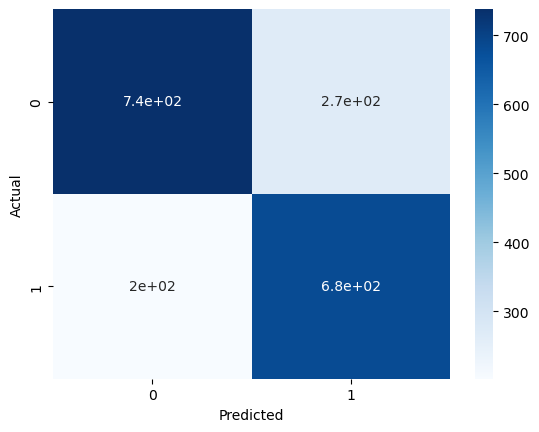

documents classifed mine but they are not mine:

1      another promising direction build turingxe2x80...
21      7, july 2020table iresults ablation study 256...
24     user-based studies interpretability decision-r...
32     2 explaining local perturbationsanother class ...
51      inother cases, process quality measured perfo...
52      posturex0canalysis detection head gesture (sh...
56      hands-on tutorial european conference machine...
58      simple explanations lack nuances necessaryto ...
62      inproceedings 2020 ieee international confere...
70      proposed method, spectral rel-evance analysis...
83      wecompare xai4fl popular sbfl techniques com-...
93      case uncertainty learner model com-plexity pe...
95      however,its complexity large number hidden ne...
102     properties csre basedon fact soil rammed mixt...
107    for nlp sentiment analysis, saliency map taket...
110     whatmust happen person satisfied attemptto ex...
115     reason overwhelming researchers

In [30]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': [3, 5] , 'p': [1, 2]}

grid_search = GridSearchCV(knn, param_grid, cv=kfold, n_jobs=-1)

grid_search.fit(X_train, y_train)


print('Best hyperparameters: {}'.format(grid_search.best_params_))
print('Best score: {:.2f}'.format(grid_search.best_score_))

y_pred= grid_search.predict(X_test)


print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


misclassified_tokens = np.where(y_test != y_pred)[0:10]

filtered_df = df.loc[misclassified_tokens][['Tokens', 'id']]

print("documents classifed mine but they are not mine:\n")
print(filtered_df[filtered_df['id']== 1]['Tokens'].head(20))

print()

print("documents classifed not mine but they are  mine:\n")
print(filtered_df[filtered_df['id']== 0]['Tokens'].head(20))
